In [3]:
import sys

sys.path.append('./source/')
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate, stats
import matplotlib.cm as cm
from numpy import fft
from scipy.interpolate import interp1d
from scipy import interpolate as intp
import importlib
import json

from source import plots
from source import prob_dists as pd

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%pwd

'/Users/runburg/github/dm_gal_substructure'

In [25]:
n = 0
importlib.reload(pd)
importlib.reload(plots)
params = {'R_G': 220, # Kpc
          'd_solar': 8.5, # kpc
          'psi': 40,
          'M_min': 1.0e-2, # Msun
          'M_max': 1.0e10, # Msun
          'fwimp': 1.0,
          'mean_params': {'a':77.4, 'b':0.87+0.31*n, 'c':-0.23-0.04*n},
          'nside': 128,
          'area_fermi': 2000.0, # cm^2
          'n': n,
          'log_flux_min': -15, # log10 photons/cm^2/yr
          'log_flux_max': -5, # log10 photons/cm^2/yr
          'N': 1000,
          'log_k_min': -3,
#           'log_k_min': 2,
          'log_k_max': 6,
#           'log_k_max': 6.5,
          'N_k': 250000,
          'psh_log_f_min': -5,
#           'psh_log_f_min': -4.5,
#           'psh_log_f_max': -4.7,
          'psh_log_f_max': -3.5,
          'N_psh': 500
         }

params['omega_pixel'] = 4.*np.pi/(12*params['nside']**2.) # sr
print(params['omega_pixel'])
p = params
# json.dump(p, open('source/n0.params', 'w'), indent=0)

6.391586616190171e-05


In [4]:
p = json.load(open('source/n0.params', 'r'))
p['fwimp'] = 1.78
p['nside'] = 2048
p['omega_pixel'] = 4.*np.pi/(12*p['nside']**2.) # sr
p['beta'] = 1.9
p['M_min'] = 1
p['psi'] = 100
p['N_k'] = 90000
p['N'] = 5000
p['log_k_max'] = 12
p['log_k_min'] = 0
p['log_flux_max'] = -4
p['log_flux_min'] = -13
p['psh_log_f_min'] = -9
p['psh_log_f_max'] = -4

beta is 1.9


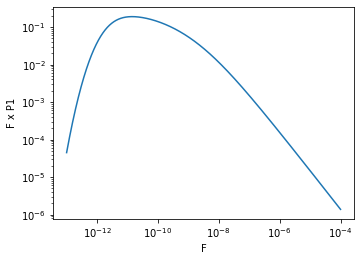

In [5]:
fluxes = np.logspace(p['log_flux_min'], p['log_flux_max'], num=p['N'])
p1_vals = pd.p1(fluxes, **p)
fig, _ = plots.check_fp1_plot(fluxes, p1_vals)

beta is 1.9
[42.52573583]


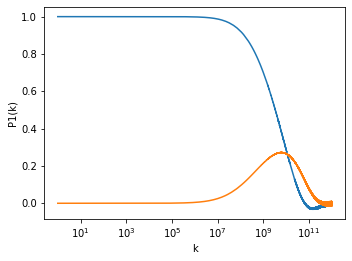

In [6]:
muu = pd.mu(**p)
print(muu)
ft_p1_vals, k = pd.ft_p1(p1_vals, fluxes, **p)
fig, _ = plots.check_ft_p1_plot(k, ft_p1_vals)

[42.52573583]


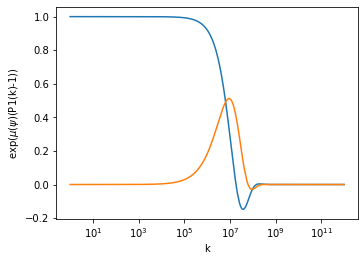

In [7]:
print(muu)
fig, _ = plots.check_psh_integrand_plot(k, ft_p1_vals, muu)

In [8]:
pf_vals, flux = pd.pf(muu, ft_p1_vals, k, **p)

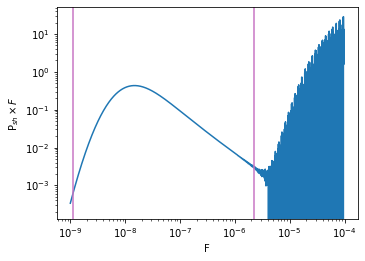

In [11]:
startl = 10
limi = -330
fig, _ = plots.check_psh_plot(flux, pf_vals.real, j=[startl, limi])

# print(pf_vals)

In [12]:
print(f'\mu \int F P1: {(muu[0] * integrate.simps(fluxes * p1_vals, fluxes))}')
print(f' \int F Psh: {integrate.simps(pf_vals[startl:limi].real * flux[startl:limi], flux[startl:limi])}')

np.savez('./output/psh_degeneracy_swave.npz', fluxes=flux[startl:limi], psh=pf_vals[startl:limi].real)



\mu \int F P1: 6.910821971734573e-08
 \int F Psh: 4.5270934804105775e-08


In [10]:
# np.trapz(pf_vals[startl:limi].real, flux[startl:limi])

In [11]:
pshvals, fxs = pd.psh(params, plot=False, infer_values=True)

beta is 1.9
Got P1(F) values
inferred log_k_max 10.000000000000018
beta is 1.9
Finished FT of P1
181 500
Finished Psh computation
\mu \int F P1: 3.7292890850282595e-05
 \int F Psh: 3.729317592787979e-05
percent error = 0.0%



 \int F Psh: 3.7292875123273985e-05


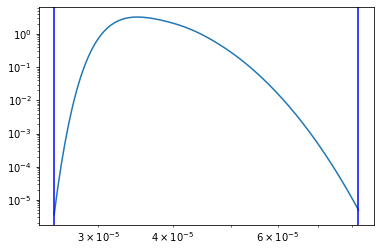

In [12]:
plt.plot(fxs, fxs * pshvals.real)
ax = plt.gca()
startl = 0
limi = -1
ax.set_xscale('log')
ax.set_yscale('log')
ax.axvline(fxs[startl], color='b')
ax.axvline(fxs[limi], color='b')

print(f' \int F Psh: {integrate.simps(pshvals[startl:limi].real * fxs[startl:limi], fxs[startl:limi])}')



In [13]:
pshop, fluxes, psis = pd.psh_of_psi(p, num_psi=10, infer_values=True)

Angle: 40.0
beta is 1.9
Got P1(F) values
inferred log_k_max 8.000000000001783
beta is 1.9
Finished FT of P1
997 1000
Finished Psh computation
\mu \int F P1: 1.8915026825300209e-07
 \int F Psh: 4.155636553876053e-07
percent error = 119.7%

Angle: 55.55555555555556
beta is 1.9
Got P1(F) values
inferred log_k_max 8.000000000001803
beta is 1.9
Finished FT of P1
993 1000
Finished Psh computation
\mu \int F P1: 1.3400732124181887e-07
 \int F Psh: -7.326190322566647e-08
percent error = -154.67%

Angle: 71.11111111111111
beta is 1.9
Got P1(F) values
inferred log_k_max 8.500000000001824
beta is 1.9
Finished FT of P1
985 1000
Finished Psh computation
\mu \int F P1: 1.0154729821209857e-07
 \int F Psh: -6.129144482998278e-05
percent error = -60457.53%

Angle: 86.66666666666666
beta is 1.9
Got P1(F) values
inferred log_k_max 8.500000000001846
beta is 1.9
Finished FT of P1
977 1000
Finished Psh computation
\mu \int F P1: 8.101895258320888e-08
 \int F Psh: -0.00013071344117632154
percent error = -161

(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:xlabel='F [photons cm$^{-2}$ yr$^{-1}$]', ylabel='F x Psh'>)

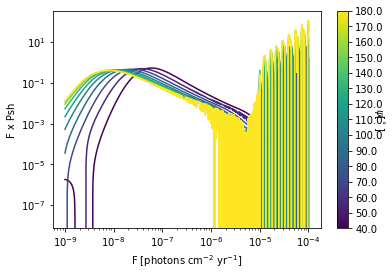

In [14]:
plots.psh_func_psi_plot(pshop, fluxes, psis, outfile='./output/n0_psh_of_psi.png')

In [15]:
importlib.reload(pd)
psh_2dfunc = pd.interp_and_save_psh(p, pshop, fluxes, psis, outfile='./output/n0_pshfunc.npz')

Returned P_sh(\psi, flux)


[Text(1, 0.0, '40.0'),
 Text(1, 0.2, '50.0'),
 Text(1, 0.4, '60.0'),
 Text(1, 0.6000000000000001, '70.0'),
 Text(1, 0.8, '80.0'),
 Text(1, 1.0, '90.0')]

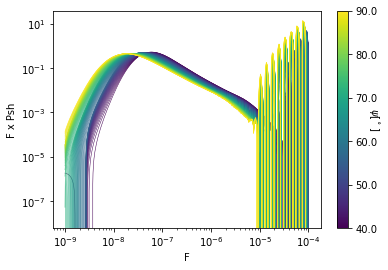

In [16]:
numnum = 100
psis = np.linspace(40, 90, num=numnum)
colors = cm.viridis(np.linspace(0, 1, num=numnum))

fig, ax = plt.subplots()

psh_vals_over_psi = []
fxs = flux
for psi, col in zip(psis, colors):
    ax.plot(fxs, fxs * psh_2dfunc(psi, fxs).flatten(), label=rf"{psi}$^\circ$", color=col, lw=0.5)
   
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('F')
ax.set_ylabel('F x Psh')
cbarlabs = np.arange(min(psis), max(psis)+1, step=10)
cbar = fig.colorbar(cm.ScalarMappable(cmap=cm.viridis), ticks=np.linspace(0, 1, num=len(cbarlabs)))
cbar.set_label(r'$\psi$[$^\circ$]', rotation=270)
cbar.ax.set_yticklabels(cbarlabs)

In [17]:
with np.load('./output/n0_pshfunc.npz') as f:
    psi = f['psi']
    fluxes = f['flux']
    psh2d = f['psh']

pshfunc2d = intp.interp2d(psi, fluxes, psh2d, bounds_error=False, fill_value=0)
fluxes = fluxes[0:-55]

0.9984753031008319
0.9986323373941884
0.9987893716875449
0.9987733885451535
0.9987357782232937
0.9987183471601223
0.9987066815994331
0.9987273428665001
0.9987641675474451
0.9987440544744252
0.9986783911982334
0.9984697685429605
0.9980824466638365
0.9976011311661787
0.996931828431453
0.996269720571314
0.9956327947722272
0.9950377450630405
0.9947777040730538
0.994517663083067


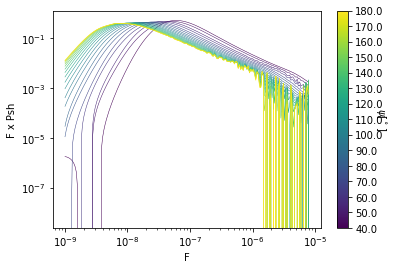

In [18]:
numnum = 20
psis = np.linspace(40, 180, num=numnum)
colors = cm.viridis(np.linspace(0, 1, num=numnum))

fig, ax = plt.subplots()

psh_vals_over_psi = []
fxs = fluxes
for psi, col in zip(psis, colors):
    ax.plot(fxs, fxs * pshfunc2d(psi, fxs).flatten(), label=rf"{psi}$^\circ$", color=col, lw=0.5)
    print(np.trapz(pshfunc2d(psi, fxs).flatten(), fxs))
   
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('F')
ax.set_ylabel('F x Psh')
cbarlabs = np.arange(min(psis), max(psis)+1, step=10)
cbar = fig.colorbar(cm.ScalarMappable(cmap=cm.viridis), ticks=np.linspace(0, 1, num=len(cbarlabs)))
cbar.set_label(r'$\psi$[$^\circ$]', rotation=270)
cbar.ax.set_yticklabels(cbarlabs);

In [19]:
psh_2dfunc = pd.interp_and_save_psh(p, pshop, fluxes, psis, outfile='./output/n0_pshfunc.npz')

TypeError: object of type 'numpy.float64' has no len()